In [5]:
PrimeQ=lambda x: all(x % i != 0 for i in range(int(x**0.5)+1)[2:]) and x>1

In [49]:
import numpy as np
import pandas as pd
import ipyparallel as ipp
import matplotlib as plt

In [50]:
AbsoluteTiming[primo = PrimeQ[lista = -1 + 2 ^ Range [75]];]
Pick[lista,primo]

SyntaxError: invalid syntax (<ipython-input-50-d4e9d174c7b6>, line 1)

In [1]:
import numpy as np
import ipyparallel as ipp
import matplotlib.pyplot as plt
c = ipp.Client()
dview = c[:]

#### Primos de mersenne

In [2]:
def PrimeQ1(x):
    import numpy as np
    return all(x%i for i in np.arange(int(x**0.5)+1)[2:])
PrimeQ1(3), PrimeQ1(5), PrimeQ1(8), PrimeQ1(1)

(True, True, False, True)

In [14]:
%timeit list = dview.map_sync(PrimeQ1, 2**np.arange(25)-1)
def PrimeQ1(x):
    import numpy as np
    return all(x%i for i in np.arange(int(x**0.5)+1)[2:])
PrimeQ1(3), PrimeQ1(5), PrimeQ1(8), PrimeQ1(1)

10 loops, best of 3: 51.8 ms per loop


(True, True, False, True)

In [7]:
%timeit list = dview.map_sync(PrimeQ1, 2**np.arange(25)-1)
lista1 = []
for i in np.arange(25)[2:]:
    if list[i] == True:
        lista1.append(i)
        print (lista)

10 loops, best of 3: 53.3 ms per loop


TypeError: 'type' object is not subscriptable

In [11]:
#%timeit c[3].apply_sync(PrimeQ0, 25)
lista1 = []
for i in np.arange(25)[2:]:
    if list[i] == True:
        lista1.append(i)
        print (lista1)

TypeError: 'type' object is not subscriptable

In [13]:
def PrimeQ2(x):
    import numpy as np
    lista = np.arange(np.int(x**0.5)+1)[2:]
    resid = np.mod(x, lista)
    return np.all(resid)
PrimeQ2(3), PrimeQ2(5), PrimeQ2(8), PrimeQ2(1)

(True, True, False, True)

In [16]:
%timeit c[1].apply_sync(PrimeQ2, 25)
def PrimeQ2(x):
    import numpy as np
    lista = np.arange(np.int(x**0.5)+1)[2:]
    resid = np.mod(x, lista)
    return np.all(resid)
PrimeQ2(3), PrimeQ2(5), PrimeQ2(8), PrimeQ2(1)

The slowest run took 9.80 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 31.6 ms per loop


(True, True, False, True)

#### LoadBalancedView & DirectView
* LoadBalancedView se ejecuta en cualquier motor 
* DirectView: tiene una ejecución directa en todos los motores


#### All --> (np.all)
* Devuelve True solo si todos los valores son True

In [17]:
np.all([[False,True],[False,True]])

False

In [18]:
np.all([[True,True],[True,True]])

True

In [19]:
def PrimeQ1(x):
    import numpy as np
    return np.all(np.array([x%i for i in np.arange(int(x**0.5)+1)[2:]]))
PrimeQ1(7)

True

In [20]:
def PrimeQ1(x):
    import numpy as np
    lista1 = np.arange(np.int(x**0.5)+1)[2:] 
    return np.all(np.array(np.mod(x, lista1)))
PrimeQ1(7)

True

In [21]:
%timeit dview.map_sync(PrimeQ2, np.arange(10))

The slowest run took 5.02 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 53.1 ms per loop


In [28]:
def func():
    for med in np.arange(5,15):
        print (np.mod(np.arange(15), med))
%timeit dview.map_sync(func(), np.arange(15))

[0 1 2 3 4 0 1 2 3 4 0 1 2 3 4]
[0 1 2 3 4 5 0 1 2 3 4 5 0 1 2]
[0 1 2 3 4 5 6 0 1 2 3 4 5 6 0]
[0 1 2 3 4 5 6 7 0 1 2 3 4 5 6]
[0 1 2 3 4 5 6 7 8 0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4]
[ 0  1  2  3  4  5  6  7  8  9 10  0  1  2  3]
[ 0  1  2  3  4  5  6  7  8  9 10 11  0  1  2]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12  0  1]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13  0]


CompositeError: one or more exceptions from call to method: None
[0:apply]: TypeError: 'NoneType' object is not callable
[1:apply]: TypeError: 'NoneType' object is not callable

In [29]:
def PrimeQ0(x):
    import numpy as np
    return all(x%i for i in np.arange(int(x**0.5)+1)[2:])

In [32]:

from time import time
lista1 = []
for i in np.arange(10):
    time1 = time()
    c[0].apply_sync(PrimeQ0, 2**i)
    time2 = time()
    lista1.append(time2-time1) 
lista1

[0.04000234603881836,
 0.031001567840576172,
 0.031001806259155273,
 0.039002180099487305,
 0.04900312423706055,
 0.04100203514099121,
 0.04200243949890137,
 0.039002180099487305,
 0.031001806259155273,
 0.027001619338989258]

#### Graficando 
* plt.plot(range(10), lista1)
* plt.show()

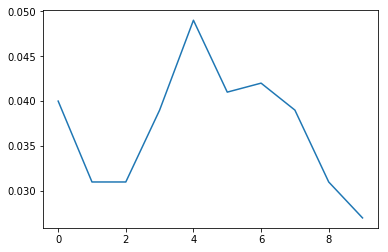

In [33]:
#Grafica de la lista1
plt.plot(range(10), lista1)
plt.show()

In [34]:
# utilizando map para la funcion PrimeQ0
from time import time
lista2 = []
for i in np.arange(10):
    time1 = time()
    dview.map_sync(PrimeQ0, np.arange(10))
    time2 = time()
    lista2.append(time2-time1) 
lista2

[0.09510397911071777,
 0.08200478553771973,
 0.0740041732788086,
 0.06400346755981445,
 0.061003684997558594,
 0.06800365447998047,
 0.06800413131713867,
 0.07500410079956055,
 0.05700325965881348,
 0.06500387191772461]

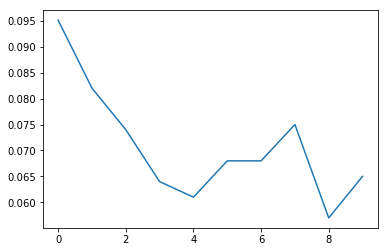

In [35]:
#Ahora su grafica 
plt.plot(range(10), lista2)
plt.show()


In [36]:
from time import time
lista3 = []
for i in np.arange(25):
    time1 = time()
    c[0].apply_sync(PrimeQ0, 2**i)
    time2 = time()
    lista3.append(time2-time1) 
lista3

[0.052602291107177734,
 0.03300189971923828,
 0.03500223159790039,
 0.031001567840576172,
 0.039002180099487305,
 0.039002180099487305,
 0.031001806259155273,
 0.041002511978149414,
 0.03800201416015625,
 0.03800225257873535,
 0.03500199317932129,
 0.039002180099487305,
 0.04600262641906738,
 0.04200243949890137,
 0.036002159118652344,
 0.042200565338134766,
 0.03200173377990723,
 0.02000117301940918,
 0.031200170516967773,
 0.015599966049194336,
 0.031200170516967773,
 0.031199932098388672,
 0.031199932098388672,
 0.015600204467773438,
 0.015599727630615234]

#### comparacion entre apply y map con la funcion PrimeQ0

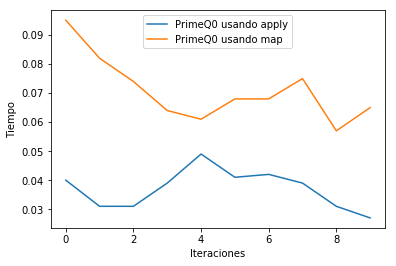

In [47]:

plt.plot(range(10), lista1, label = 'PrimeQ0 usando apply') 
plt.plot(range(10), lista2, label = "PrimeQ0 usando map")

plt.legend(loc = "upper center")
plt.xlabel("Iteraciones")
plt.ylabel("Tiempo")
plt.show()